In [2]:
from collections import defaultdict
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)  # filter np.matrix warning

<b>Baltimore City Part 1 Crime Data</b><br>
https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/about<br>
This dataset represents the location and characteristics of major (Part 1) crime against persons such as homicide, shooting, robbery, aggravated assault etc. within the City of Baltimore.

In [29]:
#import dataset
#removed aboyt 163 records from dates before 2011
df = pd.read_csv('Part_1_Crime_Data.csv')

/var/folders/mv/mb9gxhzn0nd4z0481q089vgw0000gn/T/ipykernel_79376/4147562878.py:2: DtypeWarning: Columns (8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Part_1_Crime_Data.csv')#, usecols=['title','type','genres','imdb_score'])


In [30]:
df

RowID      CCNO           CrimeDateTime CrimeCode  \
0       551115  19I04219  2011/01/01 00:00:00+00        2A   
1       554881  11A01127  2011/01/01 00:00:00+00        6G   
2       554940  11A01120  2011/01/01 00:00:00+00        6E   
3       554866  11A00683  2011/01/01 00:01:00+00        6J   
4       554928  13F02687  2011/01/01 00:01:00+00        6G   
...        ...       ...                     ...       ...   
557262     206  23C05842  2023/03/18 21:38:00+00        4E   
557263     301  23C05850  2023/03/18 21:46:00+00       3AF   
557264     302  23C05850  2023/03/18 21:46:00+00       3AF   
557265     303  23C05856  2023/03/18 22:00:00+00        4E   
557266     314  23C05861  2023/03/18 23:25:00+00       3CO   

                    Location           Description Inside_Outside  \
0       1300 W LAFAYETTE AVE                  RAPE            NaN   
1               0 E CROSS ST               LARCENY              I   
2            2700 HARLEM AVE               LARCENY              O   
3              0 E OSTEND ST               LARCENY              I   
4            700 RAPPOLLA ST               LARCENY              I   
...                      ...                   ...            ...   
557262    2900 O''DONNELL ST        COMMON ASSAULT            NaN   
557263      1500 KINGSWAY RD               ROBBERY            NaN   
557264      1500 KINGSWAY RD               ROBBERY            NaN   
557265     2400 LAKEVIEW AVE        COMMON ASSAULT            NaN   
557266                   NaN  ROBBERY - COMMERCIAL            NaN   

                  Weapon   Post Gender   Age                       Race  \
0                  OTHER    724      M  16.0  BLACK_OR_AFRICAN_AMERICAN   
1                    NaN    942      F  26.0                      WHITE   
2                    NaN    721      M  44.0  BLACK_OR_AFRICAN_AMERICAN   
3                    NaN    942      M  24.0                      WHITE   
4                    NaN    233    NaN   NaN                    UNKNOWN   
...                  ...    ...    ...   ...                        ...   
557262               NaN  214.0      F  29.0                      WHITE   
557263           FIREARM  412.0      M  14.0  BLACK_OR_AFRICAN_AMERICAN   
557264           FIREARM  412.0      M  14.0  BLACK_OR_AFRICAN_AMERICAN   
557265  PERSONAL_WEAPONS  133.0      F  57.0  BLACK_OR_AFRICAN_AMERICAN   
557266  PERSONAL_WEAPONS  111.0    NaN   NaN                        NaN   

       Ethnicity   District    Neighborhood   Latitude  Longitude  \
0            NaN    WESTERN     HARLEM PARK  39.298868 -76.639339   
1            NaN   SOUTHERN    FEDERAL HILL  39.277032 -76.613387   
2            NaN    WESTERN          MOSHER  39.295730 -76.661589   
3            NaN   SOUTHERN    FEDERAL HILL  39.274917 -76.612816   
4            NaN  SOUTHEAST       GREEKTOWN  39.284330 -76.552329   
...          ...        ...             ...        ...        ...   
557262       NaN  SOUTHEAST          Canton  39.279988 -76.575151   
557263   UNKNOWN  NORTHEAST          Hillen  39.344465 -76.592156   
557264   UNKNOWN  NORTHEAST          Hillen  39.344465 -76.592156   
557265       NaN    CENTRAL  Reservoir Hill  39.315827 -76.632526   
557266       NaN    CENTRAL        Downtown  39.289591 -76.614979   

                                 GeoLocation               Premise  \
0       (39.2988675017226,-76.6393394366371)                   NaN   
1        (39.277031763102,-76.6133872139485)  TAVERN/NIGHT CLUB      
2        (39.295729630066,-76.6615889848001)  STREET                 
3       (39.2749166643744,-76.6128157483058)     ROW/TOWNHOUSE-OCC   
4       (39.2843300177669,-76.5523288838531)  SCHOOL                 
...                                      ...                   ...   
557262                (39.279988,-76.575151)                   NaN   
557263                (39.344465,-76.592156)                   NaN   
557264                (39.344465,-76.592156)                   NaN   
55726

In [31]:
df.dtypes

RowID                int64
CCNO                object
CrimeDateTime       object
CrimeCode           object
Location            object
Description         object
Inside_Outside      object
Weapon              object
Post                object
Gender              object
Age                float64
Race                object
Ethnicity           object
District            object
Neighborhood        object
Latitude           float64
Longitude          float64
GeoLocation         object
Premise             object
Total_Incidents      int64
dtype: object

In [32]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S')

In [33]:
df['Hour'] = df.CrimeDateTime.dt.hour
df['Day'] = df.CrimeDateTime.dt.day
df['Month'] = df.CrimeDateTime.dt.month
df['Year'] = df.CrimeDateTime.dt.year
df['Weekday'] = df.CrimeDateTime.dt.strftime('%a')
df['MonthName'] = df.CrimeDateTime.dt.strftime('%b')

In [35]:
df

RowID      CCNO             CrimeDateTime CrimeCode  \
0       551115  19I04219 2011-01-01 00:00:00+00:00        2A   
1       554881  11A01127 2011-01-01 00:00:00+00:00        6G   
2       554940  11A01120 2011-01-01 00:00:00+00:00        6E   
3       554866  11A00683 2011-01-01 00:01:00+00:00        6J   
4       554928  13F02687 2011-01-01 00:01:00+00:00        6G   
...        ...       ...                       ...       ...   
557262     206  23C05842 2023-03-18 21:38:00+00:00        4E   
557263     301  23C05850 2023-03-18 21:46:00+00:00       3AF   
557264     302  23C05850 2023-03-18 21:46:00+00:00       3AF   
557265     303  23C05856 2023-03-18 22:00:00+00:00        4E   
557266     314  23C05861 2023-03-18 23:25:00+00:00       3CO   

                    Location           Description Inside_Outside  \
0       1300 W LAFAYETTE AVE                  RAPE            NaN   
1               0 E CROSS ST               LARCENY              I   
2            2700 HARLEM AVE               LARCENY              O   
3              0 E OSTEND ST               LARCENY              I   
4            700 RAPPOLLA ST               LARCENY              I   
...                      ...                   ...            ...   
557262    2900 O''DONNELL ST        COMMON ASSAULT            NaN   
557263      1500 KINGSWAY RD               ROBBERY            NaN   
557264      1500 KINGSWAY RD               ROBBERY            NaN   
557265     2400 LAKEVIEW AVE        COMMON ASSAULT            NaN   
557266                   NaN  ROBBERY - COMMERCIAL            NaN   

                  Weapon   Post Gender  ...  Longitude  \
0                  OTHER    724      M  ... -76.639339   
1                    NaN    942      F  ... -76.613387   
2                    NaN    721      M  ... -76.661589   
3                    NaN    942      M  ... -76.612816   
4                    NaN    233    NaN  ... -76.552329   
...                  ...    ...    ...  ...        ...   
557262               NaN  214.0      F  ... -76.575151   
557263           FIREARM  412.0      M  ... -76.592156   
557264           FIREARM  412.0      M  ... -76.592156   
557265  PERSONAL_WEAPONS  133.0      F  ... -76.632526   
557266  PERSONAL_WEAPONS  111.0    NaN  ... -76.614979   

                                 GeoLocation               Premise  \
0       (39.2988675017226,-76.6393394366371)                   NaN   
1        (39.277031763102,-76.6133872139485)  TAVERN/NIGHT CLUB      
2        (39.295729630066,-76.6615889848001)  STREET                 
3       (39.2749166643744,-76.6128157483058)     ROW/TOWNHOUSE-OCC   
4       (39.2843300177669,-76.5523288838531)  SCHOOL                 
...                                      ...                   ...   
557262                (39.279988,-76.575151)                   NaN   
557263                (39.344465,-76.592156)                   NaN   
557264                (39.344465,-76.592156)                   NaN   
557265                (39.315827,-76.632526)                   NaN   
557266                (39.289591,-76.614979)                   NaN   

       Total_Incidents Hour  Day  Month  Year Weekday  MonthName  
0                    1    0    1      1  2011     Sat        Jan  
1                    1    0    1      1  2011     Sat        Jan  
2                    1    0    1      1  2011     Sat        Jan  
3                    1    0    1      1  2011     Sat        Jan  
4                    1    0    1      1  2011     Sat        Jan  
...                ...  ...  ...    ...   ...     ...        ...  
557262               1   21   18      3  2023     Sat        Mar  
557263               1   21   18      3  2023     Sat        Mar  
557264               1   21   18      3  2023     Sat        Mar  
557265               1   22   18      3  2023     Sat        Mar  
557266               1   23   18      3  2023     Sat        Mar  

[557267 rows x 26 columns]

In [34]:
df.Description.value_counts()

LARCENY                 123897
COMMON ASSAULT          101473
BURGLARY                 77748
LARCENY FROM AUTO        72569
AGG. ASSAULT             63364
AUTO THEFT               47384
ROBBERY                  44577
SHOOTING                  6116
ROBBERY - COMMERCIAL      5835
ROBBERY - CARJACKING      4783
RAPE                      3659
HOMICIDE                  3375
ARSON                     2487
Name: Description, dtype: int64

In [36]:
df.CrimeCode.value_counts()

4E     101473
6D      72569
5A      45733
7A      44019
6J      30115
        ...  
3L          6
3LK         5
3G          5
3E          4
8DO         3
Name: CrimeCode, Length: 86, dtype: int64

In [42]:
df.District.value_counts()

NORTHEAST    82586
SOUTHEAST    75184
CENTRAL      64056
SOUTHERN     61447
NORTHERN     58960
NORTHWEST    54865
SOUTHWEST    54537
EASTERN      47340
WESTERN      43436
SD5            882
Name: District, dtype: int64

In [38]:
df.Neighborhood.value_counts()

DOWNTOWN                    17506
FRANKFORD                   12024
BELAIR-EDISON               10870
BROOKLYN                     9163
SANDTOWN-WINCHESTER          7359
                            ...  
Morgan Park                     2
Bellona-Gittings                2
Gwynns Falls/Leakin Park        2
DUNDALK MARINE TERMINAL         1
Greenmount Cemetery             1
Name: Neighborhood, Length: 552, dtype: int64

In [251]:
x = df.groupby(['District']).agg({'District':['count']}).reset_index()
x

District       
              count
0    CENTRAL  64056
1    EASTERN  47340
2  NORTHEAST  82586
3   NORTHERN  58960
4  NORTHWEST  54865
5        SD5    882
6  SOUTHEAST  75184
7   SOUTHERN  61447
8  SOUTHWEST  54537
9    WESTERN  43436

In [252]:
x.columns = ['District','Count']
x

District  Count
0    CENTRAL  64056
1    EASTERN  47340
2  NORTHEAST  82586
3   NORTHERN  58960
4  NORTHWEST  54865
5        SD5    882
6  SOUTHEAST  75184
7   SOUTHERN  61447
8  SOUTHWEST  54537
9    WESTERN  43436

In [2]:
#VISUALIZATION 1
#Horizontal Bar Chart listing the top movie genres on Netflix

In [250]:
#pick colors function
def pick_colors_according_to_mean_count(this_data):
    colors=[]
    avg=this_data.Count.mean()
    for each in this_data.Count:
        if each > avg*1.01:
            colors.append('lightcoral')
        elif each < avg*0.99:
            colors.append('green')
        else:
            colors.append('black')
    return colors

In [278]:
#plot Horizontal Bar Chart listing the top districts
bottom3 = 0
top3 = len(x)
d3 = x.loc[bottom3:top3]
d3 = d3.sort_values('Count', ascending=True)
d3.reset_index(inplace=True,drop=True)
d3

District  Count
0        SD5    882
1    WESTERN  43436
2    EASTERN  47340
3  SOUTHWEST  54537
4  NORTHWEST  54865
5   NORTHERN  58960
6   SOUTHERN  61447
7    CENTRAL  64056
8  SOUTHEAST  75184
9  NORTHEAST  82586

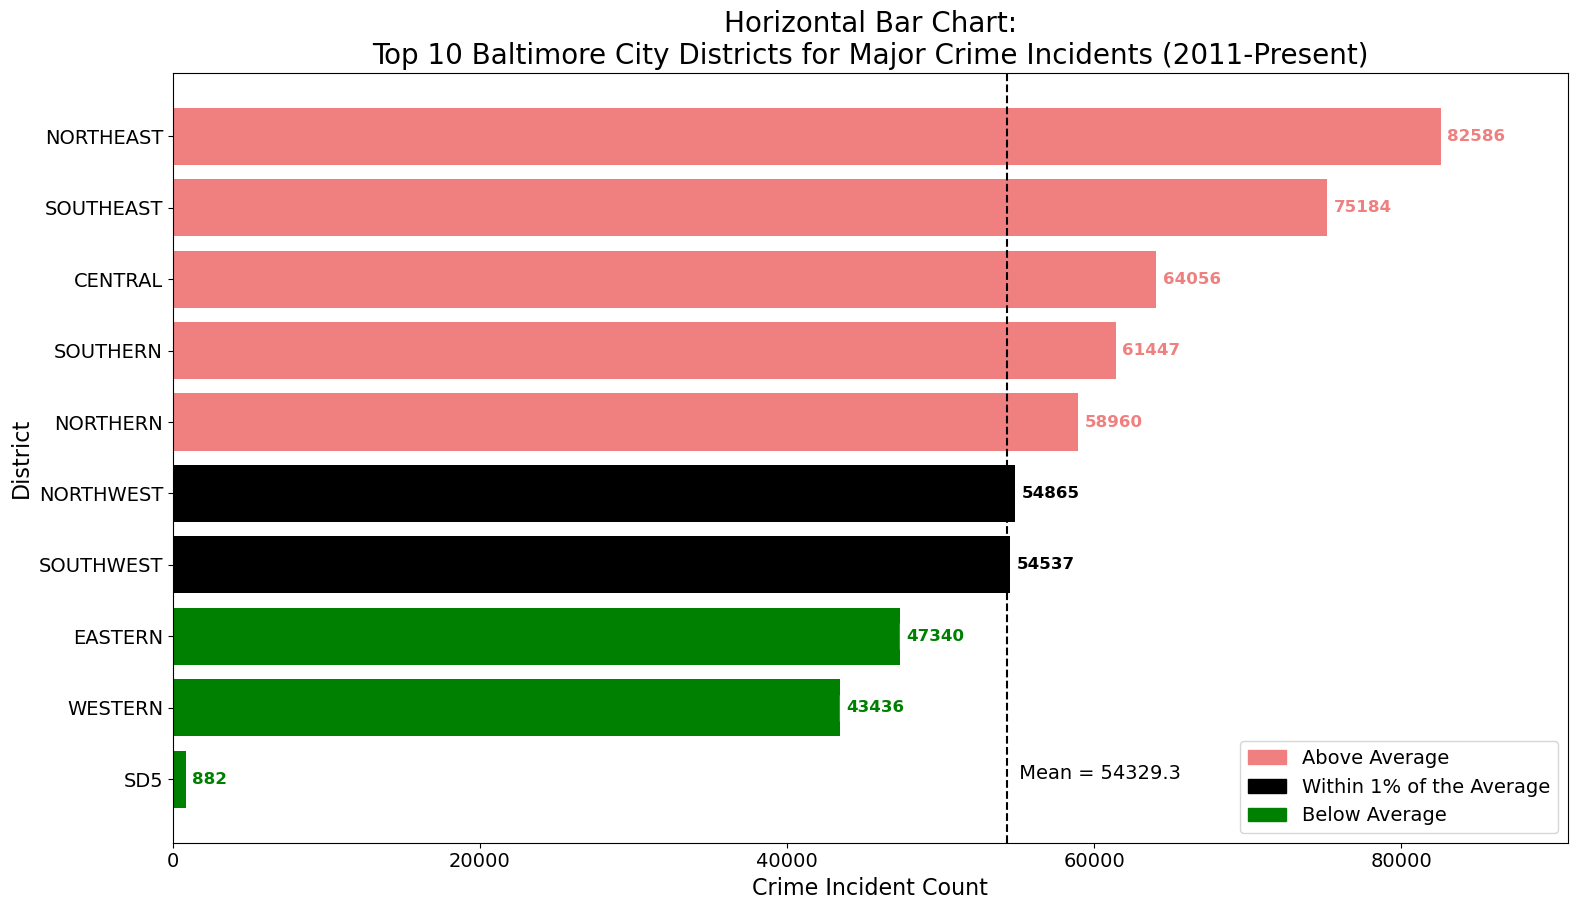

In [300]:
my_colors3 = pick_colors_according_to_mean_count(d3)

Above = mpatches.Patch(color = 'lightcoral', label='Above Average')
At = mpatches.Patch(color = 'black', label='Within 1% of the Average')
Below = mpatches.Patch(color = 'green', label='Below Average')

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.barh(d3.District, d3.Count, color=my_colors3)

for row_counter, value_at_row_counter in enumerate(d3.Count):
    if value_at_row_counter > d3.Count.mean()*1.01:
        color = 'lightcoral'
    elif value_at_row_counter < d3.Count.mean()*0.99:
        color='green'
    else:
        color='black'
    ax1.text(value_at_row_counter+400, row_counter, str(value_at_row_counter), color=color, size=12, fontweight='bold',
            ha='left', va='center',backgroundcolor='white')
plt.xlim(0,d3.Count.max()*1.1)
    
ax1.legend(loc='lower right', handles=[Above, At, Below], fontsize=14)

plt.axvline(d3.Count.mean(), color='black', linestyle='dashed')
ax1.text(d3.Count.mean()+2, 0, '  Mean = ' + str(d3.Count.mean()), rotation=0, fontsize=14)

ax1.set_title('Horizontal Bar Chart:\nTop '  + str(top3) + ' Baltimore City Districts for Major Crime Incidents (2011-Present)', size=20)
ax1.set_xlabel('Crime Incident Count', fontsize = 16)
ax1.set_ylabel('District', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


In [ ]:
#VISUALIZATION 2
#LINE PLOT crimes by day/hour

In [254]:
count_df = df.groupby(['Hour','Weekday']).agg({'Weekday':['count']}).reset_index()
#count_df = df.groupby(['Hour','Weekday']).agg({'District':['count']}).reset_index()
#fine_df = df10.groupby(['Hour','Weekday'])['ViolFine'].sum().reset_index(name='TotalFines')
count_df

Hour Weekday      
                 count
0      0     Fri  3899
1      0     Mon  3929
2      0     Sat  4680
3      0     Sun  4559
4      0     Thu  3845
..   ...     ...   ...
163   23     Sat  4584
164   23     Sun  3783
165   23     Thu  3697
166   23     Tue  3694
167   23     Wed  3580

[168 rows x 3 columns]

In [255]:
count_df.columns = ['Hour','Weekday','Count']
count_df

Hour Weekday  Count
0       0     Fri   3899
1       0     Mon   3929
2       0     Sat   4680
3       0     Sun   4559
4       0     Thu   3845
..    ...     ...    ...
163    23     Sat   4584
164    23     Sun   3783
165    23     Thu   3697
166    23     Tue   3694
167    23     Wed   3580

[168 rows x 3 columns]

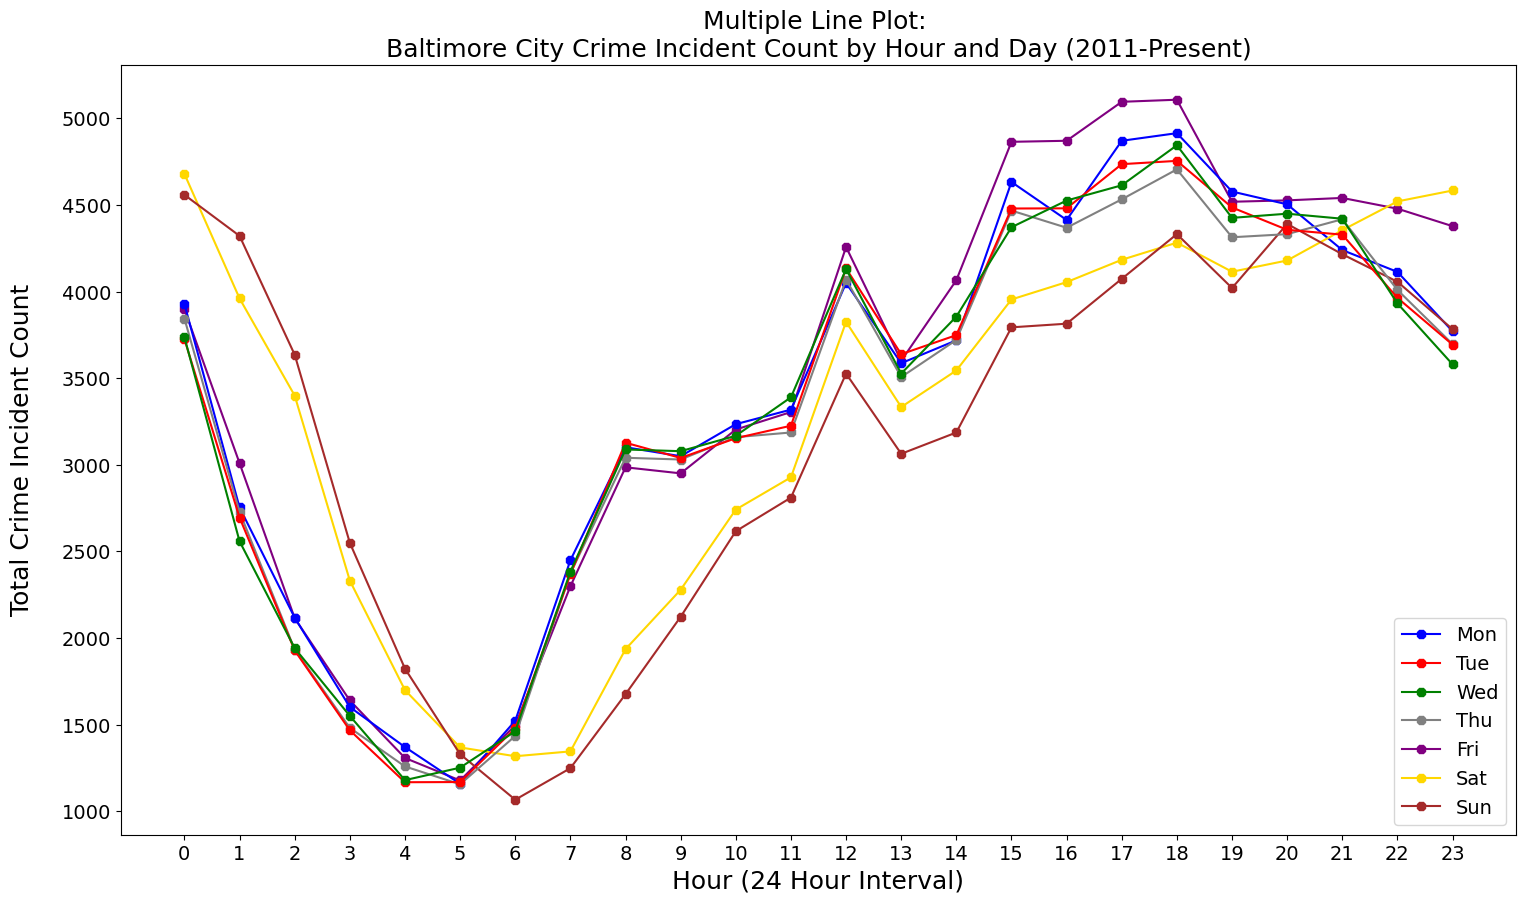

In [265]:
from matplotlib.ticker import FuncFormatter

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(1,1,1)

my_colors = {'Mon':'blue',
            'Tue':'red',
            'Wed':'green',
            'Thu':'gray',
            'Fri':'purple',
            'Sat':'gold',
            'Sun':'brown'}

for key, grp in count_df.groupby(['Weekday']):
    grp.plot(ax=ax, kind='line', x='Hour', y='Count', color = my_colors[key], label=key, marker='8')

plt.title('Multiple Line Plot: \nBaltimore City Crime Incident Count by Hour and Day (2011-Present)', fontsize=18)
ax.set_xlabel('Hour (24 Hour Interval)', fontsize=18)
ax.set_ylabel('Total Crime Incident Count', fontsize=18, labelpad=20)
ax.tick_params(axis='x',labelsize=14, rotation=0)
ax.tick_params(axis='y',labelsize=14, rotation=0)

ax.set_xticks(np.arange(24))

handles, labels = ax.get_legend_handles_labels()
handles = [handles[1],handles[5],handles[6],handles[4],handles[0],handles[2],handles[3]]
labels = [labels[1],   labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
plt.legend(handles, labels, loc='lower right', fontsize=14, ncol=1)

#ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:('$%1.1fM')%(x*1e-6)))

plt.show()

In [ ]:
#VISUALIZATION 3


In [258]:
df['Quarter'] = 'Quarter ' + df.CrimeDateTime.dt.quarter.astype('string')
pie_df = df.groupby(['Quarter','MonthName','Month']).agg({'Quarter':['count']}).reset_index()
#pie_df = df.groupby(['Quarter','MonthName','Month'])['ViolFine'].sum().reset_index(name='TotalFines')
#count_df = df.groupby(['Hour','Weekday']).agg({'Weekday':['count']}).reset_index()
pie_df = pie_df.sort_values(by=['Month'])
pie_df.reset_index(inplace=True, drop=True)
del pie_df['Month']


In [259]:
pie_df.columns = ['Quarter','MonthName','Count']
pie_df

Quarter MonthName  Count
0   Quarter 1       Jan  45443
1   Quarter 1       Feb  38694
2   Quarter 1       Mar  43535
3   Quarter 2       Apr  43108
4   Quarter 2       May  48456
5   Quarter 2       Jun  48684
6   Quarter 3       Jul  49910
7   Quarter 3       Aug  50064
8   Quarter 3       Sep  48600
9   Quarter 4       Oct  50063
10  Quarter 4       Nov  45562
11  Quarter 4       Dec  45148

In [260]:
number_outside_colors = len(pie_df.Quarter.unique())
outside_color_ref_number = np.arange(number_outside_colors)*4

number_inside_colors = len(pie_df.MonthName.unique())
all_color_ref_number = np.arange(number_outside_colors + number_inside_colors)

inside_color_ref_number = []
for each in all_color_ref_number:
    if each not in outside_color_ref_number:
        inside_color_ref_number.append(each)

print(outside_color_ref_number)
print(inside_color_ref_number)


[ 0  4  8 12]
[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]


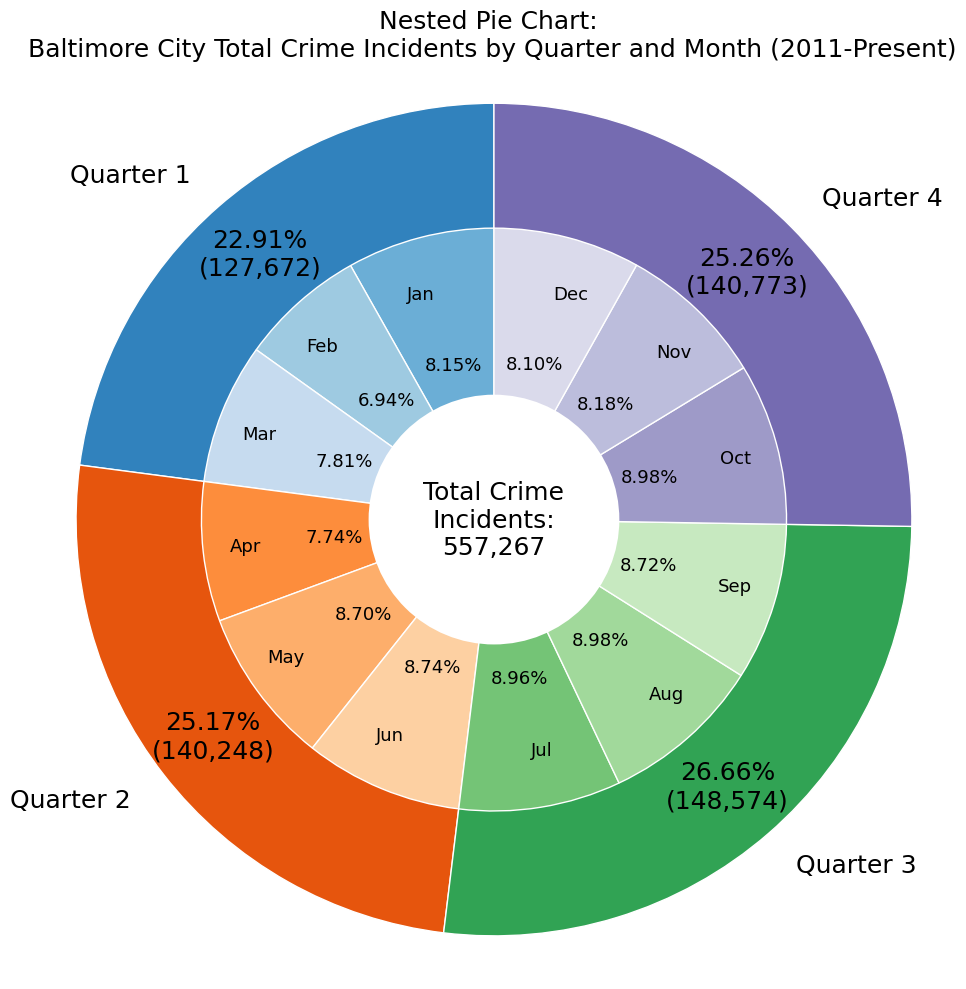

In [266]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

colormap = plt.get_cmap("tab20c")
outer_colors = colormap(outside_color_ref_number)

all_crimes = pie_df.Count.sum()

pie_df.groupby(['Quarter'])['Count'].sum().plot(
        kind='pie',radius=1, colors = outer_colors, pctdistance=0.85,
        labeldistance = 1.1, wedgeprops = dict(edgecolor='white'),textprops={'fontsize':18},
        autopct=lambda p: '{:.2f}%\n({:,.0f})'.format(p,(p/100)*all_crimes),
        startangle=90)

inner_colors = colormap(inside_color_ref_number)

pie_df['Count'].plot(
        kind='pie',radius=0.7, colors = inner_colors, pctdistance=0.55,
        labeldistance = 0.8, wedgeprops = dict(edgecolor='white'),textprops={'fontsize':13},
        labels=pie_df.MonthName,
        autopct = '%1.2f%%',
        startangle=90)

hole = plt.Circle((0,0), 0.3, fc='white')
fig1 = plt.gcf()
fig1.gca().add_artist(hole)

ax.yaxis.set_visible(False)
plt.title('Nested Pie Chart: \nBaltimore City Total Crime Incidents by Quarter and Month (2011-Present)', fontsize=18)

ax.axis('equal')
plt.tight_layout()

ax.text(0,0, 'Total Crime\nIncidents:\n' + '{:,}'.format(all_crimes), size=18, ha='center', va='center')

plt.show()

In [ ]:
#VISUALIZATION 4
#Ranking of total incidents by neighborhood and crime

In [141]:
df

RowID      CCNO             CrimeDateTime CrimeCode  \
0       551115  19I04219 2011-01-01 00:00:00+00:00        2A   
1       554881  11A01127 2011-01-01 00:00:00+00:00        6G   
2       554940  11A01120 2011-01-01 00:00:00+00:00        6E   
3       554866  11A00683 2011-01-01 00:01:00+00:00        6J   
4       554928  13F02687 2011-01-01 00:01:00+00:00        6G   
...        ...       ...                       ...       ...   
557262     206  23C05842 2023-03-18 21:38:00+00:00        4E   
557263     301  23C05850 2023-03-18 21:46:00+00:00       3AF   
557264     302  23C05850 2023-03-18 21:46:00+00:00       3AF   
557265     303  23C05856 2023-03-18 22:00:00+00:00        4E   
557266     314  23C05861 2023-03-18 23:25:00+00:00       3CO   

                    Location           Description Inside_Outside  \
0       1300 W LAFAYETTE AVE                  RAPE            NaN   
1               0 E CROSS ST               LARCENY              I   
2            2700 HARLEM AVE               LARCENY              O   
3              0 E OSTEND ST               LARCENY              I   
4            700 RAPPOLLA ST               LARCENY              I   
...                      ...                   ...            ...   
557262    2900 O''DONNELL ST        COMMON ASSAULT            NaN   
557263      1500 KINGSWAY RD               ROBBERY            NaN   
557264      1500 KINGSWAY RD               ROBBERY            NaN   
557265     2400 LAKEVIEW AVE        COMMON ASSAULT            NaN   
557266                   NaN  ROBBERY - COMMERCIAL            NaN   

                  Weapon   Post Gender  ...  \
0                  OTHER    724      M  ...   
1                    NaN    942      F  ...   
2                    NaN    721      M  ...   
3                    NaN    942      M  ...   
4                    NaN    233    NaN  ...   
...                  ...    ...    ...  ...   
557262               NaN  214.0      F  ...   
557263           FIREARM  412.0      M  ...   
557264           FIREARM  412.0      M  ...   
557265  PERSONAL_WEAPONS  133.0      F  ...   
557266  PERSONAL_WEAPONS  111.0    NaN  ...   

                                 GeoLocation               Premise  \
0       (39.2988675017226,-76.6393394366371)                   NaN   
1        (39.277031763102,-76.6133872139485)  TAVERN/NIGHT CLUB      
2        (39.295729630066,-76.6615889848001)  STREET                 
3       (39.2749166643744,-76.6128157483058)     ROW/TOWNHOUSE-OCC   
4       (39.2843300177669,-76.5523288838531)  SCHOOL                 
...                                      ...                   ...   
557262                (39.279988,-76.575151)                   NaN   
557263                (39.344465,-76.592156)                   NaN   
557264                (39.344465,-76.592156)                   NaN   
557265                (39.315827,-76.632526)                   NaN   
557266                (39.289591,-76.614979)                   NaN   

       Total_Incidents Hour Day  Month  Year Weekday MonthName    Quarter  
0                    1    0   1      1  2011     Sat       Jan  Quarter 1  
1                    1    0   1      1  2011     Sat       Jan  Quarter 1  
2                    1    0   1      1  2011     Sat       Jan  Quarter 1  
3                    1    0   1      1  2011     Sat       Jan  Quarter 1  
4                    1    0   1      1  2011     Sat       Jan  Quarter 1  
...                ...  ...  ..    ...   ...     ...       ...        ...  
557262               1   21  18      3  2023     Sat       Mar  Quarter 1  
557263               1   21  18      3  2023     Sat       Mar  Quarter 1  
557264               1   21  18      3  2023     Sat       Mar  Quarter 1  
557265               1   22  18      3  2023     Sat       Mar  Quarter 1  
557266               1   23  18      3  2023     Sat       Mar  Quarter 1  

[557267 rows x 27 columns]

In [201]:
hm_df = df.groupby(['District','Description']).agg({'Description':['count']}).reset_index()
hm_df.columns = ['District','Crime','Count']
hm_df = hm_df.pivot(index='Crime', columns='District', values = 'Count')
hm_df = hm_df.dropna(axis='columns')
hm_df = hm_df.astype(int)
hm_df = hm_df.sort_index(ascending=False)
hm_df


District              CENTRAL  EASTERN  NORTHEAST  NORTHERN  NORTHWEST  \
Crime                                                                    
SHOOTING                  492      949        658       389        666   
ROBBERY - COMMERCIAL      722      423        918       804        654   
ROBBERY - CARJACKING      403      300        708       522        656   
ROBBERY                  5819     3398       6790      4548       4207   
RAPE                      457      347        502       387        377   
LARCENY FROM AUTO       10633     5348       9808      8805       5855   
LARCENY                 17772     8986      16580     15095      11463   
HOMICIDE                  214      495        409       215        443   
COMMON ASSAULT          11963    10709      14489      8614       9044   
BURGLARY                 5880     5944      13666      9835       8990   
AUTO THEFT               3242     3265       8798      4538       5865   
ARSON                     148      238        432       209        313   
AGG. ASSAULT             6311     6938       8828      4999       6332   

District              SOUTHEAST  SOUTHERN  SOUTHWEST  WESTERN  
Crime                                                          
SHOOTING                    423       698        838      941  
ROBBERY - COMMERCIAL        827       560        521      344  
ROBBERY - CARJACKING        450       566        537      436  
ROBBERY                    6600      4726       3456     3057  
RAPE                        385       422        381      337  
LARCENY FROM AUTO         13663      7678       4929     3268  
LARCENY                   18700     14138      10647     7814  
HOMICIDE                    226       355        470      516  
COMMON ASSAULT            12514     10564      11075     9599  
BURGLARY                   9458      9192       8529     5656  
AUTO THEFT                 5042      5204       5529     4342  
ARSON                       192       307        334      229  
AGG. ASSAULT               6704      7037       7291     6897

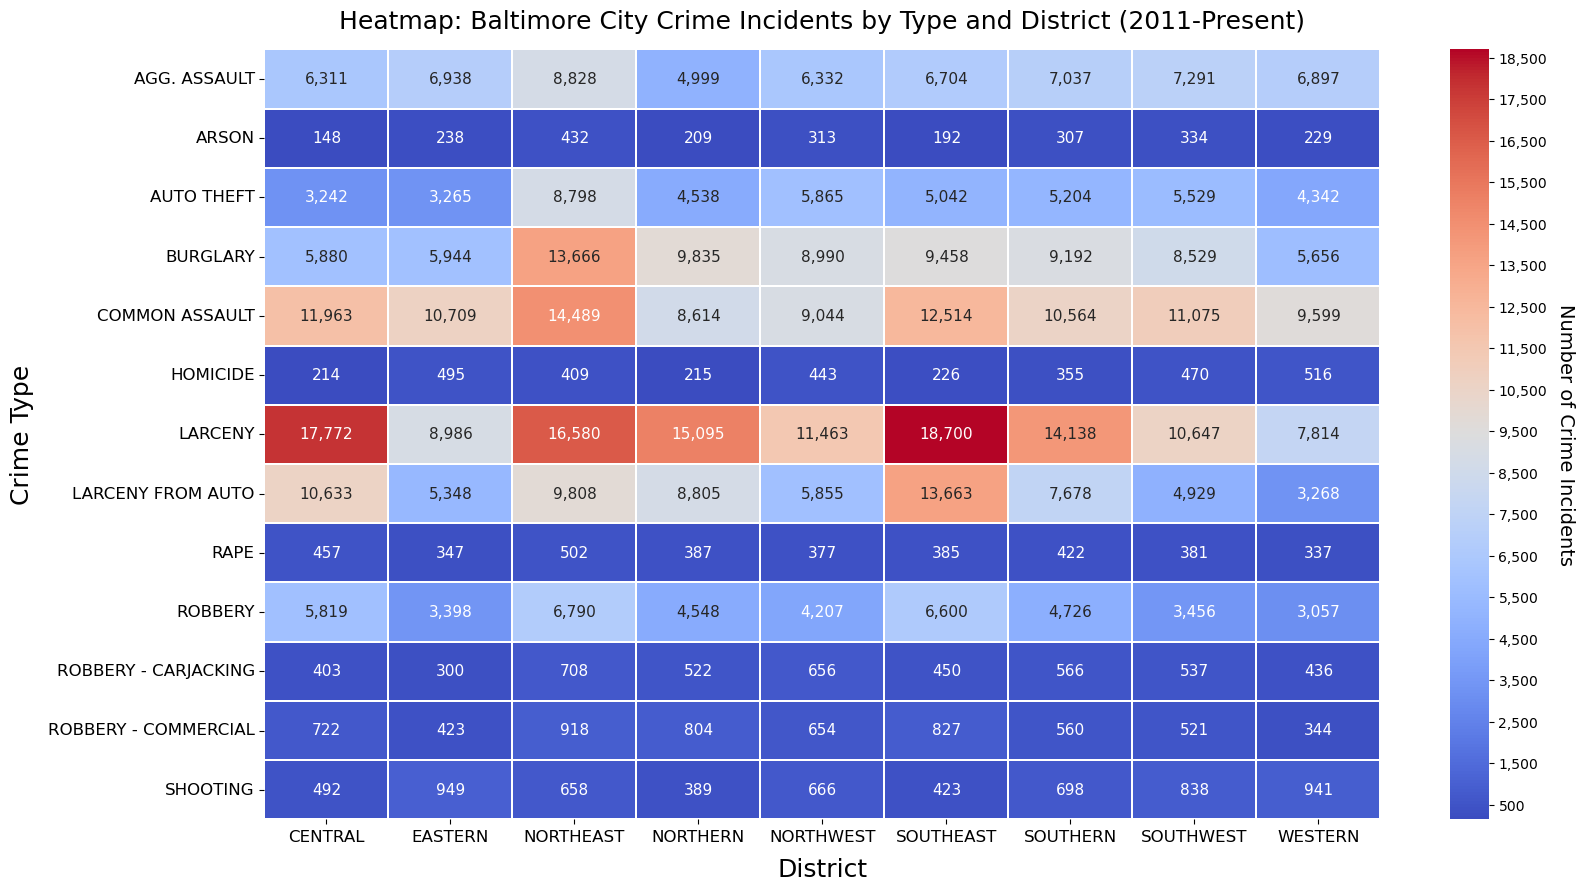

In [267]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter

fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(1,1,1)

comma_fmt = FuncFormatter(lambda x, p: format(int(x),','))

ax = sns.heatmap(hm_df, linewidth=0.2, annot = True, cmap='coolwarm', fmt=',',
                 square=False, annot_kws={'size':11},
                 cbar_kws = {'format':comma_fmt, 'orientation':'vertical'})

plt.title('Heatmap: Baltimore City Crime Incidents by Type and District (2011-Present)', fontsize=18, pad=15)
plt.xlabel('District', fontsize=18, labelpad = 10)
plt.ylabel('Crime Type', fontsize=18, labelpad = 10)
plt.yticks(rotation=0, size=12)
plt.xticks(rotation=0, size=12)

ax.invert_yaxis()

cbar = ax.collections[0].colorbar

max_count = hm_df.to_numpy().max()
min_count = hm_df.to_numpy().min()

my_colorbar_ticks = [*range(500,max_count,1000)]
cbar.set_ticks(my_colorbar_ticks)

my_colorbar_ticks_labels = ['{:,}'.format(each) for each in my_colorbar_ticks]
cbar.set_ticklabels(my_colorbar_ticks_labels)

cbar.set_label('Number of Crime Incidents', fontsize=14, rotation=270, labelpad=20, color='black')

plt.show()

In [ ]:
#VISUALIZATION 5
#Ranking of total incidents by neighborhood and crime

In [212]:
c=0
for each in df['GeoLocation']:
    try:
        x = str(each).replace(")","").split("(")[-1].split(",")
        df.loc[c,'Lat'] = '%.6f' % float(x[0])
        df.loc[c,'Lon'] = '%.6f' % float(x[1])
    except:
        df.loc[c,'Lat'] = np.NaN
        df.loc[c,'Lon'] = np.NaN
    c+=1

df

RowID      CCNO             CrimeDateTime CrimeCode  \
0       551115  19I04219 2011-01-01 00:00:00+00:00        2A   
1       554881  11A01127 2011-01-01 00:00:00+00:00        6G   
2       554940  11A01120 2011-01-01 00:00:00+00:00        6E   
3       554866  11A00683 2011-01-01 00:01:00+00:00        6J   
4       554928  13F02687 2011-01-01 00:01:00+00:00        6G   
...        ...       ...                       ...       ...   
557262     206  23C05842 2023-03-18 21:38:00+00:00        4E   
557263     301  23C05850 2023-03-18 21:46:00+00:00       3AF   
557264     302  23C05850 2023-03-18 21:46:00+00:00       3AF   
557265     303  23C05856 2023-03-18 22:00:00+00:00        4E   
557266     314  23C05861 2023-03-18 23:25:00+00:00       3CO   

                    Location           Description Inside_Outside  \
0       1300 W LAFAYETTE AVE                  RAPE            NaN   
1               0 E CROSS ST               LARCENY              I   
2            2700 HARLEM AVE               LARCENY              O   
3              0 E OSTEND ST               LARCENY              I   
4            700 RAPPOLLA ST               LARCENY              I   
...                      ...                   ...            ...   
557262    2900 O''DONNELL ST        COMMON ASSAULT            NaN   
557263      1500 KINGSWAY RD               ROBBERY            NaN   
557264      1500 KINGSWAY RD               ROBBERY            NaN   
557265     2400 LAKEVIEW AVE        COMMON ASSAULT            NaN   
557266                   NaN  ROBBERY - COMMERCIAL            NaN   

                  Weapon   Post Gender  ...  Total_Incidents Hour Day Month  \
0                  OTHER    724      M  ...                1    0   1     1   
1                    NaN    942      F  ...                1    0   1     1   
2                    NaN    721      M  ...                1    0   1     1   
3                    NaN    942      M  ...                1    0   1     1   
4                    NaN    233    NaN  ...                1    0   1     1   
...                  ...    ...    ...  ...              ...  ...  ..   ...   
557262               NaN  214.0      F  ...                1   21  18     3   
557263           FIREARM  412.0      M  ...                1   21  18     3   
557264           FIREARM  412.0      M  ...                1   21  18     3   
557265  PERSONAL_WEAPONS  133.0      F  ...                1   22  18     3   
557266  PERSONAL_WEAPONS  111.0    NaN  ...                1   23  18     3   

        Year  Weekday  MonthName    Quarter        Lat         Lon  
0       2011      Sat        Jan  Quarter 1  39.298868  -76.639339  
1       2011      Sat        Jan  Quarter 1  39.277032  -76.613387  
2       2011      Sat        Jan  Quarter 1  39.295730  -76.661589  
3       2011      Sat        Jan  Quarter 1  39.274917  -76.612816  
4       2011      Sat        Jan  Quarter 1  39.284330  -76.552329  
...      ...      ...        ...        ...        ...         ...  
557262  2023      Sat        Mar  Quarter 1  39.279988  -76.575151  
557263  2023      Sat        Mar  Quarter 1  39.344465  -76.592156  
557264  2023      Sat        Mar  Quarter 1  39.344465  -76.592156  
557265  2023      Sat        Mar  Quarter 1  39.315827  -76.632526  
557266  2023      Sat        Mar  Quarter 1  39.289591  -76.614979  

[557267 rows x 29 columns]

In [271]:
#df2022 = df#[df['Year']==2022].reset_index()
df['FormatDate'] = df['Weekday'] + ', ' + df['MonthName'] + ' ' + df['Day'].astype(str) + ', ' + df['Year'].astype(str)
df


RowID      CCNO             CrimeDateTime CrimeCode  \
0       551115  19I04219 2011-01-01 00:00:00+00:00        2A   
1       554881  11A01127 2011-01-01 00:00:00+00:00        6G   
2       554940  11A01120 2011-01-01 00:00:00+00:00        6E   
3       554866  11A00683 2011-01-01 00:01:00+00:00        6J   
4       554928  13F02687 2011-01-01 00:01:00+00:00        6G   
...        ...       ...                       ...       ...   
557262     206  23C05842 2023-03-18 21:38:00+00:00        4E   
557263     301  23C05850 2023-03-18 21:46:00+00:00       3AF   
557264     302  23C05850 2023-03-18 21:46:00+00:00       3AF   
557265     303  23C05856 2023-03-18 22:00:00+00:00        4E   
557266     314  23C05861 2023-03-18 23:25:00+00:00       3CO   

                    Location           Description Inside_Outside  \
0       1300 W LAFAYETTE AVE                  RAPE            NaN   
1               0 E CROSS ST               LARCENY              I   
2            2700 HARLEM AVE               LARCENY              O   
3              0 E OSTEND ST               LARCENY              I   
4            700 RAPPOLLA ST               LARCENY              I   
...                      ...                   ...            ...   
557262    2900 O''DONNELL ST        COMMON ASSAULT            NaN   
557263      1500 KINGSWAY RD               ROBBERY            NaN   
557264      1500 KINGSWAY RD               ROBBERY            NaN   
557265     2400 LAKEVIEW AVE        COMMON ASSAULT            NaN   
557266                   NaN  ROBBERY - COMMERCIAL            NaN   

                  Weapon   Post Gender  ...  Hour Day Month  Year Weekday  \
0                  OTHER    724      M  ...     0   1     1  2011     Sat   
1                    NaN    942      F  ...     0   1     1  2011     Sat   
2                    NaN    721      M  ...     0   1     1  2011     Sat   
3                    NaN    942      M  ...     0   1     1  2011     Sat   
4                    NaN    233    NaN  ...     0   1     1  2011     Sat   
...                  ...    ...    ...  ...   ...  ..   ...   ...     ...   
557262               NaN  214.0      F  ...    21  18     3  2023     Sat   
557263           FIREARM  412.0      M  ...    21  18     3  2023     Sat   
557264           FIREARM  412.0      M  ...    21  18     3  2023     Sat   
557265  PERSONAL_WEAPONS  133.0      F  ...    22  18     3  2023     Sat   
557266  PERSONAL_WEAPONS  111.0    NaN  ...    23  18     3  2023     Sat   

        MonthName    Quarter        Lat         Lon         FormatDate  
0             Jan  Quarter 1  39.298868  -76.639339   Sat, Jan 1, 2011  
1             Jan  Quarter 1  39.277032  -76.613387   Sat, Jan 1, 2011  
2             Jan  Quarter 1  39.295730  -76.661589   Sat, Jan 1, 2011  
3             Jan  Quarter 1  39.274917  -76.612816   Sat, Jan 1, 2011  
4             Jan  Quarter 1  39.284330  -76.552329   Sat, Jan 1, 2011  
...           ...        ...        ...         ...                ...  
557262        Mar  Quarter 1  39.279988  -76.575151  Sat, Mar 18, 2023  
557263        Mar  Quarter 1  39.344465  -76.592156  Sat, Mar 18, 2023  
557264        Mar  Quarter 1  39.344465  -76.592156  Sat, Mar 18, 2023  
557265        Mar  Quarter 1  39.315827  -76.632526  Sat, Mar 18, 2023  
557266        Mar  Quarter 1  39.289591  -76.614979  Sat, Mar 18, 2023  

[557267 rows x 30 columns]

In [215]:
import folium

In [298]:
center_of_map = [39.3024273, -76.6195023]

my_map = folium.Map(location=center_of_map, 
                   zoom_start = 12,
                   width='90%',
                   height='100%',
                   left='5%',
                   right='5%',
                   top='0%', 
                   title='Map: Baltimore City Homicides (2011-Present)')

tiles = ['cartodbpositron','openstreetmap','stamenterrain','stamentoner']

for tile in tiles:
    folium.TileLayer(tile).add_to(my_map)
    
folium.LayerControl().add_to(my_map)

for i in range(0,len(df)):
    crime = df.loc[i, 'Description']
    if crime == 'HOMICIDE':
        color = 'red'
    else:
        color = 'black'
    
    try:
        if color != 'black':
            folium.Circle(location=[df.loc[i,'Lat'],df.loc[i,'Lon']],
                         tooltip = df.loc[i,'Description'],
                         popup = 'Date: {}\n Neighborhood: {}'.format(df.loc[i,'FormatDate'],df.loc[i,'Neighborhood']),
                         radius=50,
                         color=color,
                         fill=True,
                         fill_color=color,
                         fill_opacity = 0.5).add_to(my_map)
    except:
        pass

my_map.save('Dots_Homicide_Baltimore.html')
print("Pizza")
my_map

Pizza


In [12]:
#VISUALIZATION 2
#Dual Axis Bar Chart list showing the genre count and IMDB average score for movie genres on Netflix


In [13]:
#create df with only genres and scores
dfGenreScoreOnly = dfMovieGenre2[['genres','imdb_score']].copy().reset_index(drop=True)
dfGenreScoreOnly

genres  imdb_score
0                            [drama,  crime]         8.2
1     [drama,  action,  thriller,  european]         7.7
2                [fantasy,  action,  comedy]         8.2
3                             [war,  action]         7.7
4                                   [comedy]         8.0
...                                      ...         ...
3739                                      []         NaN
3740                       [romance,  drama]         6.8
3741                                 [drama]         7.7
3742                                [comedy]         3.8
3743                                      []         NaN

[3744 rows x 2 columns]

In [14]:
#split genres and create genre and score lists
gen_list=[]
score_list=[]
for index, row in dfGenreScoreOnly.iterrows():
    for i in row[0]:
        if i == '':
            gen_list.append('none')
        else:
            gen_list.append(i.strip())
        score_list.append(row[1])
        
#check lengths of lists
print(len(gen_list))
print(len(score_list))

9224
9224


In [15]:
#convert lists to df
dfGenScores = pd.DataFrame(gen_list)
dfGenScores = dfGenScores.rename(columns={0:"genres"})
dfGenScores['scores'] = score_list
dfGenScores

genres  scores
0        drama     8.2
1        crime     8.2
2        drama     7.7
3       action     7.7
4     thriller     7.7
...        ...     ...
9219   romance     6.8
9220     drama     6.8
9221     drama     7.7
9222    comedy     3.8
9223      none     NaN

[9224 rows x 2 columns]

In [16]:
#fill in NAN values - 0 for none, mean for other genres
mean_scores = dfGenScores['scores'].mean()

dfGenScoresNan = dfGenScores[dfGenScores['scores'].notnull()]
dfGenScoresGenNan = dfGenScores[(dfGenScores['genres'] != 'none') & (dfGenScores['scores'].isna())].fillna(round(mean_scores,1))
dfGenScoresNoneNan = dfGenScores[(dfGenScores['genres'] == 'none') & (dfGenScores['scores'].isna())].fillna(0.0)

dfGenScores2 = [dfGenScoresNan, dfGenScoresGenNan, dfGenScoresNoneNan]
dfGenScoresAll = pd.concat(dfGenScores2)
dfGenScoresAll
                                                                                                           

genres  scores
0        drama     8.2
1        crime     8.2
2        drama     7.7
3       action     7.7
4     thriller     7.7
...        ...     ...
9133      none     0.0
9147      none     0.0
9210      none     0.0
9218      none     0.0
9223      none     0.0

[9224 rows x 2 columns]

In [17]:
#aggregate categories and generate mean scores for each
dfGenScoresGp = dfGenScoresAll.groupby(dfGenScoresAll['genres']).mean()
dfGenScoresGp

scores
genres                 
action         6.075766
animation      6.369504
comedy         6.116168
crime          6.264587
documentation  6.836007
drama          6.301759
european       6.287500
family         6.010256
fantasy        6.120000
history        6.866897
horror         5.596552
music          6.424607
none           0.417647
reality        6.900000
romance        6.068911
scifi          5.877941
sport          6.415044
thriller       6.011879
war            6.798058
western        6.192857

In [18]:
##clean up avgscore df
dfGenScoresGp = dfGenScoresGp.round(1)
dfGenScoresGp = dfGenScoresGp.sort_values(by=['genres'], ascending=True).reset_index()
dfGenScoresGp = dfGenScoresGp.rename(columns={"genres":"Genre","scores":"AvgScore"}).reset_index(drop=True)
dfGenScoresGp

Genre  AvgScore
0          action       6.1
1       animation       6.4
2          comedy       6.1
3           crime       6.3
4   documentation       6.8
5           drama       6.3
6        european       6.3
7          family       6.0
8         fantasy       6.1
9         history       6.9
10         horror       5.6
11          music       6.4
12           none       0.4
13        reality       6.9
14        romance       6.1
15          scifi       5.9
16          sport       6.4
17       thriller       6.0
18            war       6.8
19        western       6.2

In [19]:
#sort the counts
dfGenreCount = dfGenreCount.sort_values(by=['Count'], ascending=False)
dfGenreCount

Genre  Count
0           drama   1876
1          comedy   1571
2        thriller    825
3          action    718
4         romance    698
5   documentation    611
6           crime    545
7          family    351
8        european    344
9         fantasy    315
10      animation    282
11         horror    261
12          scifi    204
13          music    191
14        history    145
15          sport    113
16            war    103
17           none     34
18        western     28
19        reality      9

In [20]:
#merge dfs to one df for plotting
dfDualBars = pd.merge(dfGenreCount, dfGenScoresGp, on=["Genre", "Genre"])
dfDualBars

Genre  Count  AvgScore
0           drama   1876       6.3
1          comedy   1571       6.1
2        thriller    825       6.0
3          action    718       6.1
4         romance    698       6.1
5   documentation    611       6.8
6           crime    545       6.3
7          family    351       6.0
8        european    344       6.3
9         fantasy    315       6.1
10      animation    282       6.4
11         horror    261       5.6
12          scifi    204       5.9
13          music    191       6.4
14        history    145       6.9
15          sport    113       6.4
16            war    103       6.8
17           none     34       0.4
18        western     28       6.2
19        reality      9       6.9

In [21]:
#grab the first 10
dfDualBars = dfDualBars[0:10]
dfDualBars

Genre  Count  AvgScore
0          drama   1876       6.3
1         comedy   1571       6.1
2       thriller    825       6.0
3         action    718       6.1
4        romance    698       6.1
5  documentation    611       6.8
6          crime    545       6.3
7         family    351       6.0
8       european    344       6.3
9        fantasy    315       6.1

In [22]:
#autolabel function
def autolabel(these_bars, this_ax, place_of_decimals, symbols):
    for each_bar in these_bars: 
        height = each_bar.get_height()
        this_ax.text(each_bar.get_x()+each_bar.get_width()/2,height*1.01, symbols+format(height, place_of_decimals),
                    fontsize=11, color='black', ha='center', va='bottom')
    

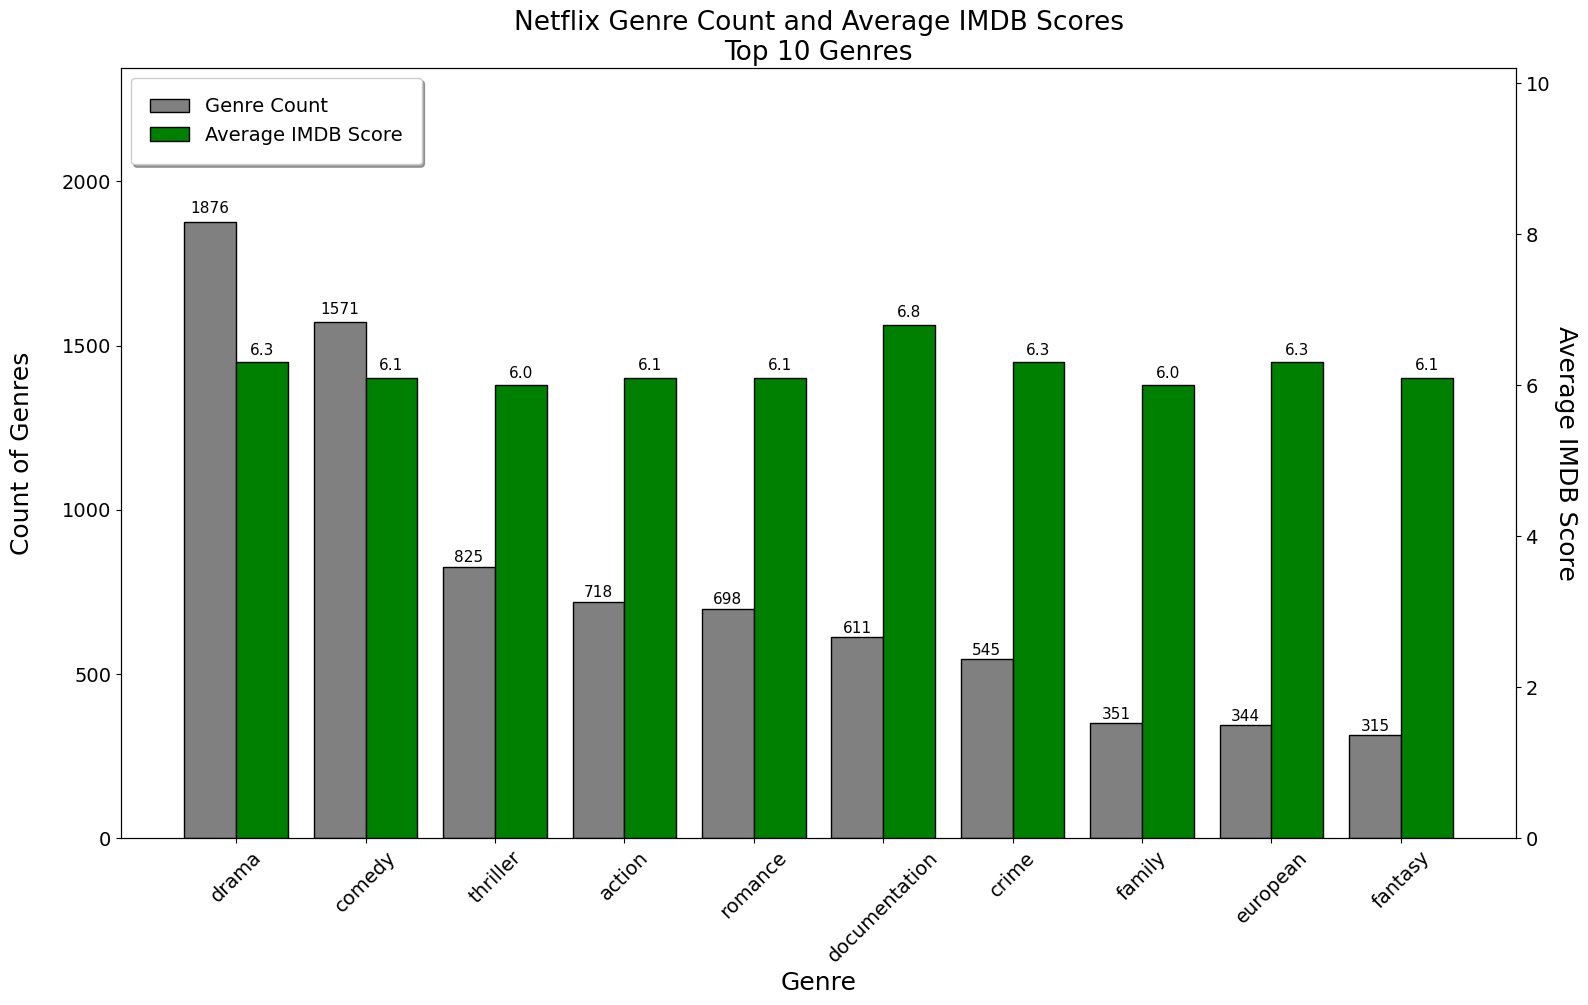

In [24]:
#plot Dual Axis Bar Chart list showing the genre count and IMDB average score for movie genres on Netflix
fig = plt.figure(figsize=(18,10))
ax1=fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
bar_width = 0.4

x_pos = np.arange(10)
count_bars = ax1.bar(x_pos-(0.5*bar_width), dfDualBars.Count, bar_width, color='gray', edgecolor='black', label='Genre Count')
aver_fine_bars = ax2.bar(x_pos+(0.5*bar_width), dfDualBars.AvgScore, bar_width, color='green', edgecolor='black', label='Average IMDB Score')

ax1.set_xlabel('Genre', fontsize=18)
ax1.set_ylabel('Count of Genres', fontsize=18, labelpad=20)
ax2.set_ylabel('Average IMDB Score', fontsize=18, rotation=270, labelpad = 20)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

plt.title('Netflix Genre Count and Average IMDB Scores\nTop 10 Genres', fontsize=19)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(dfDualBars.Genre, fontsize=14, rotation=45)

count_color, count_label = ax1.get_legend_handles_labels()
fine_color, fine_label = ax2.get_legend_handles_labels()
legend = ax1.legend(count_color + fine_color, count_label + fine_label, loc ='upper left', frameon=True, ncol=1, shadow=True,
                   borderpad = 1, fontsize=14)

ax1.set_ylim(0,dfDualBars.Count.max()*1.25)
ax2.set_ylim(0,dfDualBars.AvgScore.max()*1.50)

autolabel(count_bars, ax1, '.0f','')
autolabel(aver_fine_bars, ax2, '.1f','')

plt.show()
